# PM 2.5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train.csv").copy()

In [3]:
df.head()

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,0,2013,-37.0,1.0,0.0,4.0,-0.7,102-37,0.0,NNW,4.4
1,1,201-37,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,NaN
2,2,2013,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,3,2013,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,4,2013,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31527 entries, 0 to 31526
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      31527 non-null  int64  
 1   year            31512 non-null  object 
 2   month           31521 non-null  float64
 3   day             31507 non-null  float64
 4   hour            31519 non-null  float64
 5   PM2.5           31513 non-null  float64
 6   temperature     31508 non-null  float64
 7   pressure        31500 non-null  object 
 8   rain            31515 non-null  float64
 9   wind_direction  31467 non-null  object 
 10  wind_speed      31502 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.6+ MB


In [5]:
df.describe()

,Unnamed: 0,month,day,hour,PM2.5,temperature,rain,wind_speed
count,31527.000000,31521.000000,31507.000000,31519.000000,3.151300e+04,31508.000000,31515.000000,31502.000000
mean,16195.784217,6.451001,15.413083,11.288429,2.095628e+03,14.356532,0.071744,1.696949
std,9514.606331,3.326838,33.139925,37.127145,3.575087e+05,11.296366,0.949720,1.338706
min,0.000000,-37.000000,-5656.000000,-6464.000000,3.000000e+00,-16.800000,0.000000,-79.000000
25%,7888.500000,4.000000,8.000000,5.000000,2.300000e+01,4.300000,0.000000,0.900000
50%,16279.000000,6.000000,15.000000,11.000000,5.800000e+01,15.800000,0.000000,1.400000
75%,24371.500000,9.000000,23.000000,18.000000,1.130000e+02,23.700000,0.000000,2.200000
max,35054.000000,12.000000,31.000000,23.000000,6.346466e+07,40.500000,72.500000,11.200000


In [6]:
df.corr()

,Unnamed: 0,month,day,hour,PM2.5,temperature,rain,wind_speed
Unnamed: 0,1.000000,0.053745,-0.000974,-0.004918,-0.009109,-0.018812,0.008747,0.093004
month,0.053745,1.000000,0.007470,0.009215,-0.004149,0.150297,0.014065,-0.145393
day,-0.000974,0.007470,1.000000,0.000686,-0.001939,0.014903,0.000181,-0.009156
hour,-0.004918,0.009215,0.000686,1.000000,0.001019,0.036235,0.002572,0.020382
PM2.5,-0.009109,-0.004149,-0.001939,0.001019,1.000000,-0.004347,0.007282,0.000801
temperature,-0.018812,0.150297,0.014903,0.036235,-0.004347,1.000000,0.033579,0.038875
rain,0.008747,0.014065,0.000181,0.002572,0.007282,0.033579,1.000000,0.021422
wind_speed,0.093004,-0.145393,-0.009156,0.020382,0.000801,0.038875,0.021422,1.000000


In [7]:
df.isnull().sum()

Unnamed: 0         0
year              15
month              6
day               20
hour               8
PM2.5             14
temperature       19
pressure          27
rain              12
wind_direction    60
wind_speed        25
dtype: int64

## EDA and Feature Enginnering

In [8]:
df.dropna(inplace=True)

In [9]:
df['year'].value_counts()

2015    8522
2014    8235
2013    7301
2016    7026
2017     287
Name: year, dtype: int64

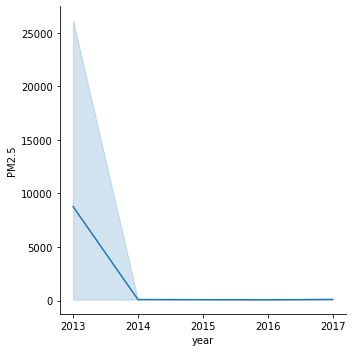

In [10]:
sns.relplot(x=df['year'],y=df['PM2.5'],data=df,kind='line')

In [11]:
df[df['year']=='201-37']

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed


In [12]:
df

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,0,2013,-37.0,1.0,0.0,4.0,-0.7,102-37,0.0,NNW,4.4
2,2,2013,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,3,2013,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,4,2013,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0
6,6,2013,3.0,1.0,6.0,3.0,-2.6,1026.5,0.0,NNE,2.5
...,...,...,...,...,...,...,...,...,...,...,...
31522,35022,2017,2.0,27.0,6.0,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,35032,2017,2.0,27.0,16.0,75.0,15.9,1014,0.0,SW,2.9
31524,35035,2017,2.0,27.0,19.0,51.0,11.5,1014.1,0.0,SSW,1.0
31525,35042,2017,2.0,28.0,2.0,9.0,8.6,1016,0.0,NNE,0.9


In [13]:
df.drop(0,inplace=True) # Deleting Unecessary year
df.drop('Unnamed: 0',axis=1,inplace=True)

In [14]:
df.isnull().sum()

year              0
month             0
day               0
hour              0
PM2.5             0
temperature       0
pressure          0
rain              0
wind_direction    0
wind_speed        0
dtype: int64

In [15]:
# Handeling Nan values
#df['year'].fillna('2015',inplace=True)

In [16]:
# Year vs Max Pm2.5
year=['2013','2014','2015','2016','2017']
max1=[]
for i in year:
    temp=df[df['year']==i]
    max1.append(temp['PM2.5'].mean())

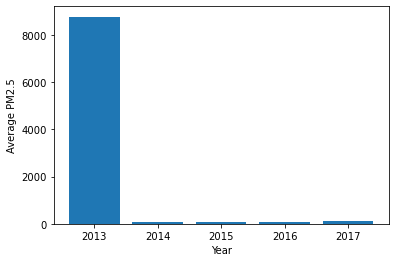

In [17]:
plt.bar(year,max1)
plt.xlabel('Year')
plt.ylabel("Average PM2.5")
plt.show()

#### Observation - Average Pm2.5 was very high in year 2013 and drastically decreased onwards

<AxesSubplot:xlabel='month'>

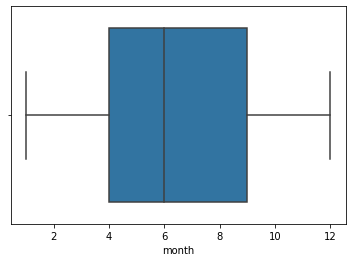

In [18]:
sns.boxplot(df['month'])

#### We can clearly observe that there are outliers present in month features

In [19]:
df[df['day']<0]

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
24455,2016,1.0,-5656.0,12.0,91.0,3.0,1016.1,0.0,WNW,2.5


In [20]:
df.drop(24455,inplace=True)

<AxesSubplot:xlabel='month', ylabel='Density'>

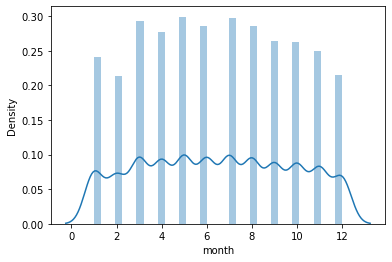

In [21]:
sns.distplot(df['month'])

<AxesSubplot:xlabel='day', ylabel='Density'>

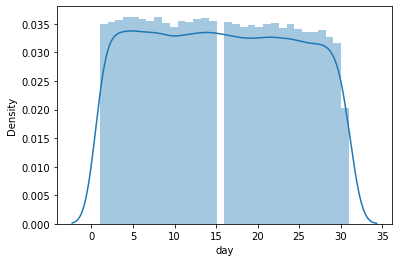

In [22]:
sns.distplot(df['day'])

In [23]:
df['hour'].describe()

count    31369.000000
mean        11.290733
std         37.212603
min      -6464.000000
25%          5.000000
50%         11.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64

In [24]:
df[df['hour']<0]

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
24391,2016,1.0,11.0,-6464.0,15.0,-4.7,1031.2,0.0,NW,3.4


In [25]:
df.drop(24391,inplace=True)

<AxesSubplot:xlabel='hour', ylabel='Density'>

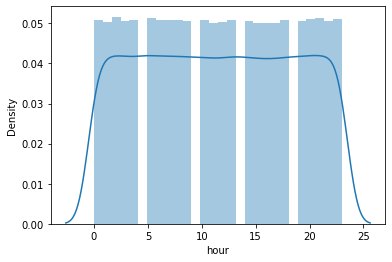

In [26]:
sns.distplot(df['hour'])

In [27]:
def f(s):
    if s=='':
        return None
    else:
        return float(s)

df['pressure']=df['pressure'].apply(f)

<AxesSubplot:xlabel='pressure'>

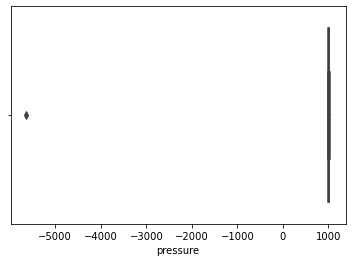

In [28]:
sns.boxplot(df['pressure'])

In [29]:
df[df['pressure']<0]

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
24314,2016,1.0,8.0,14.0,8.0,1.2,-5646.0,0.0,NNE,2.4


In [30]:
df.drop(24314,inplace=True)

<AxesSubplot:xlabel='pressure'>

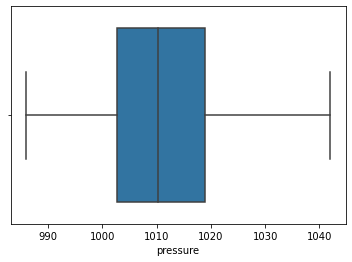

In [31]:
sns.boxplot(df['pressure'])

In [32]:
# df['pressure'].fillna(df['pressure'].mean(),inplace=True)

In [33]:
df['wind_direction'].unique()

array(['NNW', 'NW', 'N', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE',
       'WNW', 'SSE', 'ESE', 'S', 'SW'], dtype=object)

In [34]:
df['wind_direction'].value_counts()

NE     4455
ENE    3532
SW     3032
E      2334
NNE    2238
WSW    2047
SSW    1981
N      1884
NW     1552
ESE    1544
NNW    1354
S      1203
SE     1182
W      1087
WNW    1017
SSE     925
Name: wind_direction, dtype: int64

In [35]:
df['wind_speed'].describe()

count    31367.000000
mean         1.697265
std          1.337686
min        -79.000000
25%          0.900000
50%          1.400000
75%          2.200000
max         11.200000
Name: wind_speed, dtype: float64

<AxesSubplot:xlabel='wind_speed'>

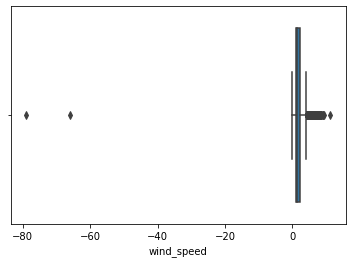

In [36]:
sns.boxplot(df['wind_speed'])

In [37]:
higher=df['wind_speed'].quantile(0.99)
lower=df['wind_speed'].quantile(0.01)
df=df[(df['wind_speed']>=lower) & (df['wind_speed']<=higher)]

<AxesSubplot:xlabel='wind_speed'>

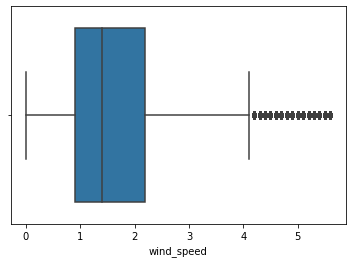

In [38]:
sns.boxplot(df['wind_speed'])

<AxesSubplot:xlabel='wind_speed', ylabel='Density'>

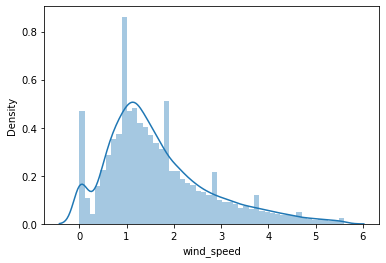

In [39]:
sns.distplot(df['wind_speed'])

<AxesSubplot:xlabel='rain', ylabel='Density'>

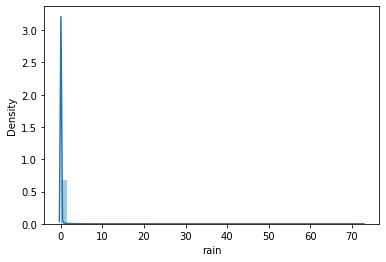

In [40]:
sns.distplot(df['rain'])

<AxesSubplot:xlabel='temperature', ylabel='Density'>

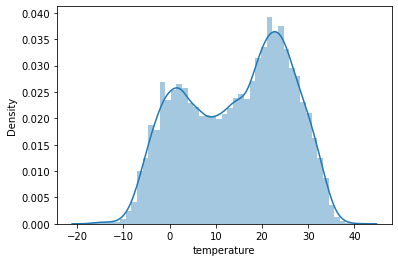

In [41]:
sns.distplot(df['temperature'])

In [42]:
# One Hot Encoding of Wind_direction
temp=pd.get_dummies(df['wind_direction'])
final_df=pd.concat([df,temp],axis=1)

In [43]:
final_df.drop('wind_direction',axis=1,inplace=True)

# Machine Learning Model

In [44]:
# We have make model for each year

final_df['year'].value_counts()

2015    8386
2014    8188
2013    7248
2016    6956
2017     285
Name: year, dtype: int64

In [45]:
def f(s):
    return int(s)
final_df['year']=final_df['year'].apply(f)

In [46]:
final_df['year'].value_counts()

2015    8386
2014    8188
2013    7248
2016    6956
2017     285
Name: year, dtype: int64

In [47]:
# We will be making separate models for each year

In [48]:
df_13=final_df[final_df['year']==2017]
df_13.drop('year',axis=1,inplace=True)

In [49]:
X=df_13.drop('PM2.5',axis=1)
Y=df_13['PM2.5']
X.shape
Y.shape

(285,)

In [50]:
df_13.describe()

,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed,E,ENE,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,...,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,1.333333,14.249123,11.810526,104.687719,0.151915,1023.985673,0.002807,1.855789,0.056140,0.084211,...,0.028070,0.150877,0.003509,0.070175,0.014035,0.021053,0.143860,0.010526,0.024561,0.031579
std,0.472234,8.526122,6.864834,117.270081,4.454064,5.421690,0.041865,1.188565,0.230597,0.278192,...,0.165464,0.358559,0.059235,0.255892,0.117842,0.143812,0.351565,0.102236,0.155056,0.175184
min,1.000000,1.000000,0.000000,3.000000,-9.700000,1003.200000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.000000,6.000000,17.000000,-2.725000,1020.100000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.000000,12.000000,65.000000,-0.500000,1024.300000,0.000000,1.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,22.000000,18.000000,155.000000,2.500000,1028.000000,0.000000,2.400000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,31.000000,23.000000,522.000000,15.900000,1035.000000,0.700000,5.400000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=13)

In [52]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()
model3.fit(X_train,Y_train)
model3.score(X_test,Y_test)

0.7155169785134288

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
model4=GradientBoostingRegressor()
model4.fit(X_train,Y_train)
model4.score(X_test,Y_test)

0.7436418660398338

In [54]:
from sklearn.ensemble import ExtraTreesRegressor
model5=ExtraTreesRegressor()
model5.fit(X_train,Y_train)
model5.score(X_test,Y_test)

0.7735991726877864

In [55]:
ans3=model5.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
print(mean_squared_error(Y_test,ans3))
mean_squared_log_error(Y_test,ans3)

2762.912494736842


0.6273661535727703

# Saving as a model

In [ ]:
import pickle
pickle.dump(model5, open('model2017', 'wb'))

In [ ]:
final_df.to_csv('final_train.csv')